 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [5]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [6]:
# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

SyntaxError: invalid syntax (<ipython-input-6-fd8bbfe4e814>, line 3)

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [9]:
# Reading whale returns
whale_returns_csv = Path('whale_returns.csv')
whale_daily_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [10]:
# Count nulls
whale_daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [11]:
# Drop nulls
whale_daily_returns.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [12]:
# Reading algorithmic returns
algo_returns_csv = Path('algo_returns.csv')
algo_daily_returns = pd.read_csv(algo_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_daily_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [12]:
# Count nulls
algo_daily_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [13]:
# Drop nulls
algo_daily_returns.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P 500 Closing Prices
sp500_returns_csv = Path('sp500_history.csv')
sp500_returns_df = pd.read_csv(sp500_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_returns_df.sort_index(inplace=True)
sp500_returns_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [15]:
# Check Data Types

sp500_returns_df.dtypes

Close    object
dtype: object

In [16]:
# Fix Data Types

sp500_returns_df["Close"] = sp500_returns_df["Close"].replace(r'[$,]' , '',regex=True).astype("float64")
sp500_returns_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [17]:
# Calculate Daily Returns
sp500_daily_returns = sp500_returns_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [18]:
# Drop nulls
sp500_daily_returns.isnull().sum()
sp500_daily_returns.dropna(inplace=True)

In [19]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns=["SP 500"]
sp500_daily_returns.head()

,SP 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolio_return = pd.concat([whale_daily_returns, algo_daily_returns, sp500_daily_returns], axis="columns" , join="inner")
all_portfolio_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

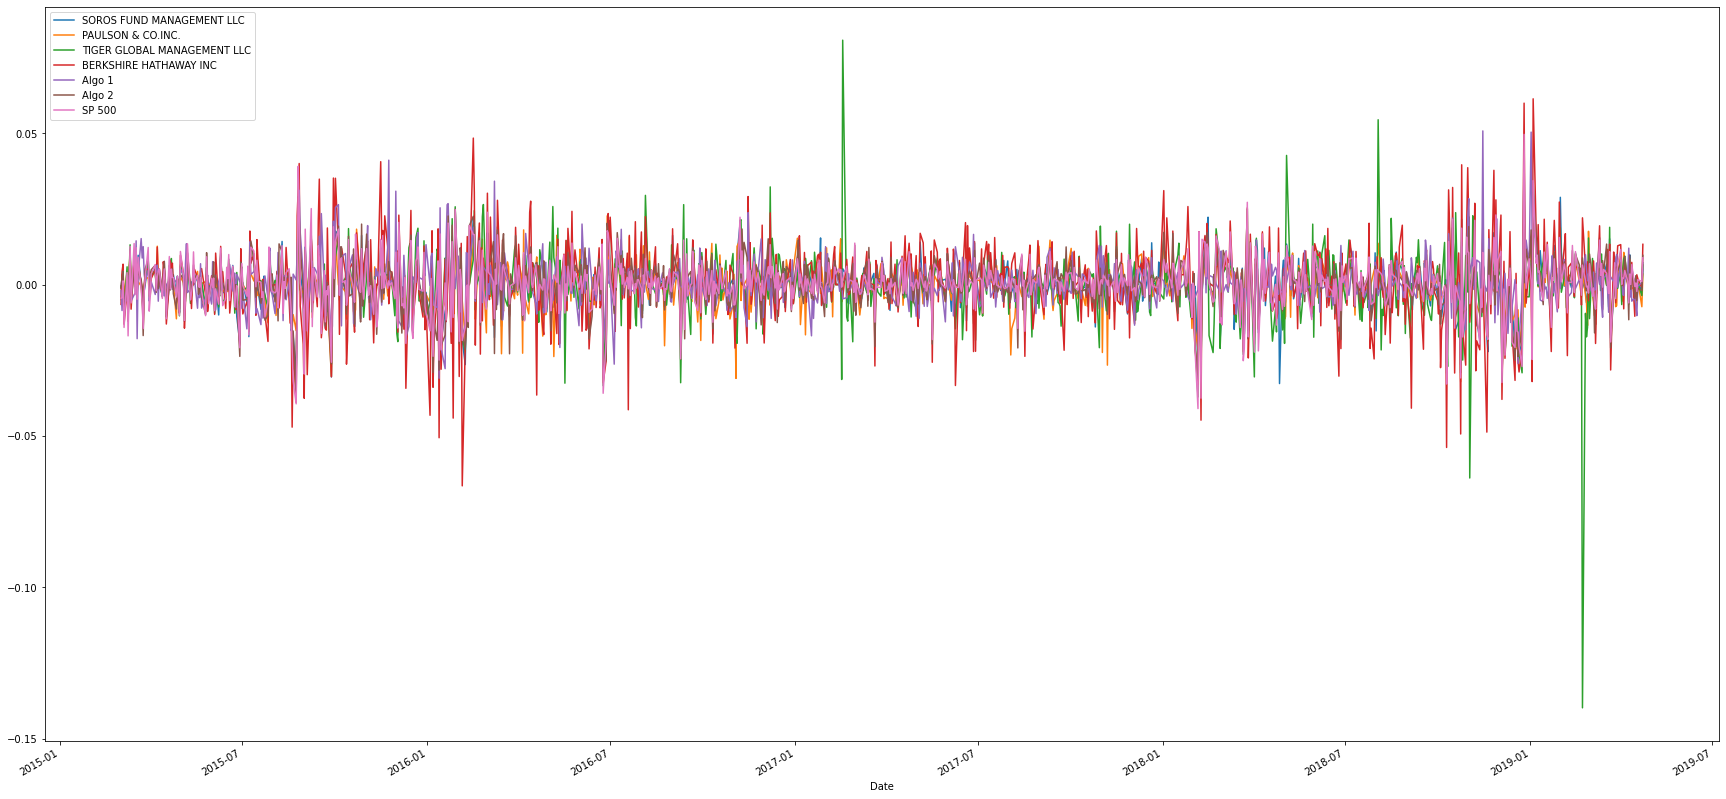

In [21]:
# Plot daily returns of all portfolios
all_portfolio_return.plot(figsize=(30,15))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

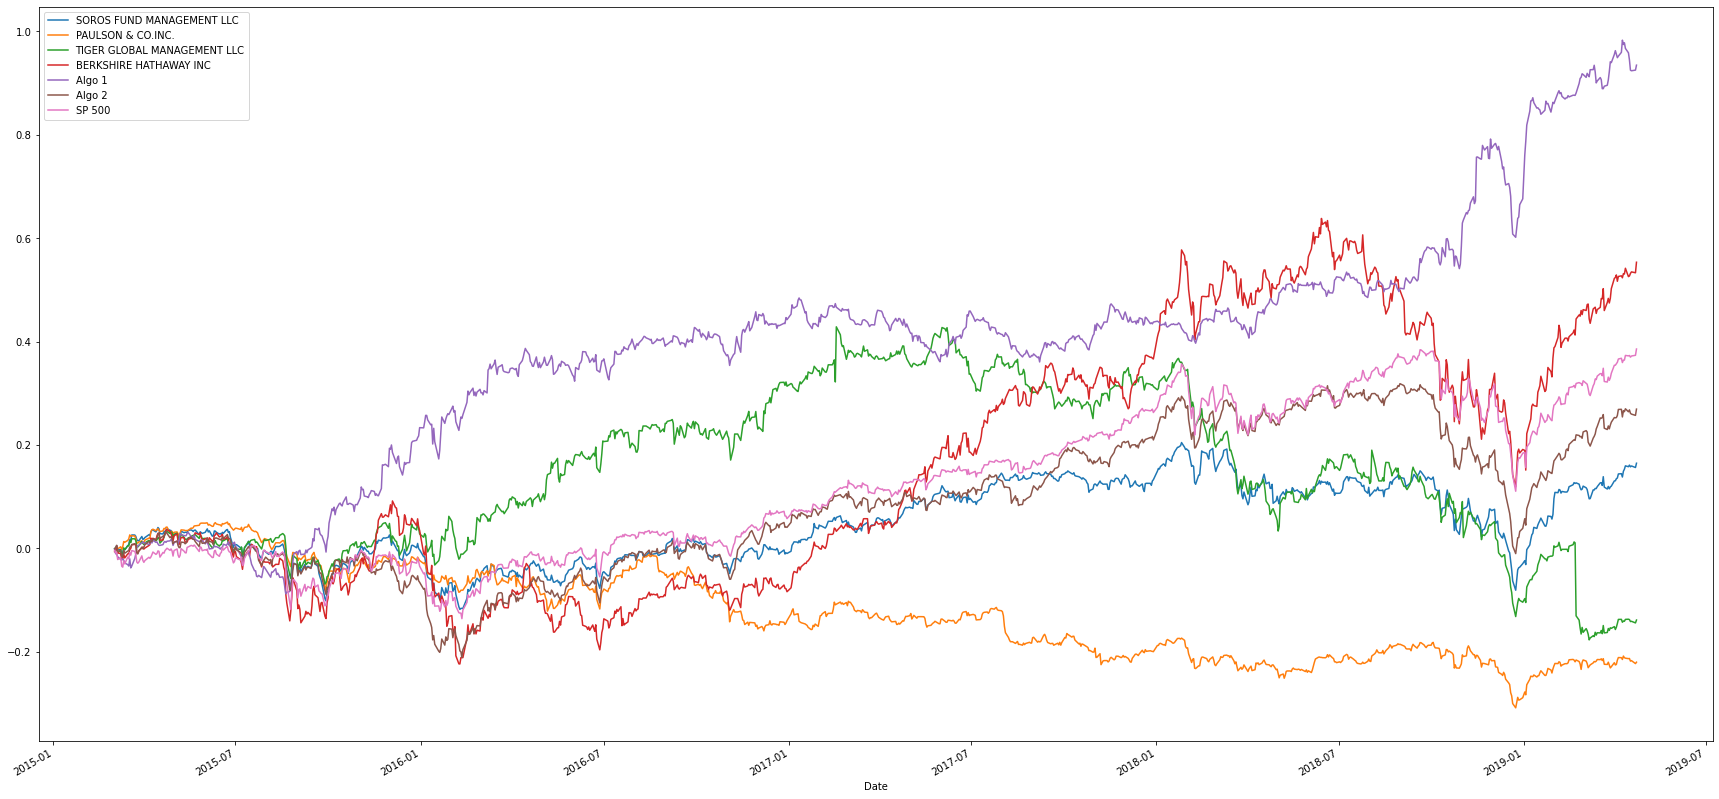

In [22]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 +all_portfolio_return.sort_index()).cumprod()-1
# Plot cumulative returns
cumulative_returns.plot(figsize=(30,15))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

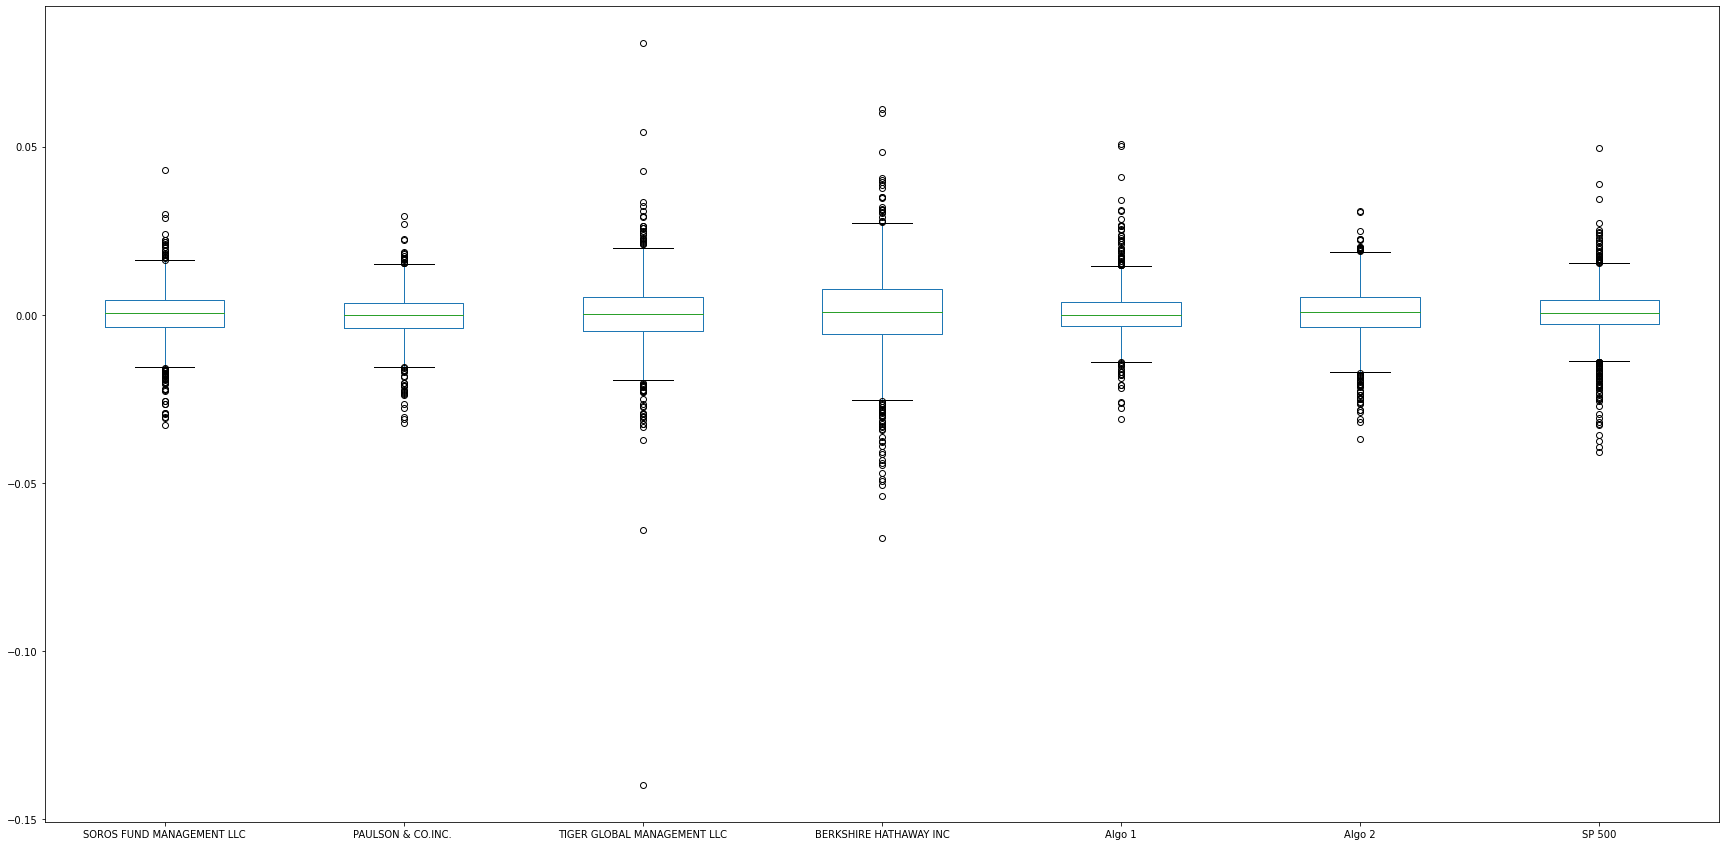

In [23]:
# Box plot to visually show risk
all_portfolio_return.plot.box(figsize=(30,15))

### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = all_portfolio_return.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP 500                         0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [25]:
# Calculate  the daily standard deviation of S&P 500

sp500_pd_std = all_portfolio_std["SP 500"]
sp500_pd_std

0.008553731597758204

In [26]:
# Determine which portfolios are riskier than the S&P 500
all_portfolio_std[(all_portfolio_std["SP 500"] < all_portfolio_std)]

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [27]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = all_portfolio_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP 500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

all_portfolio_return.rolling(window=21).std()
all_portfolio_return

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


<AxesSubplot:xlabel='Date'>

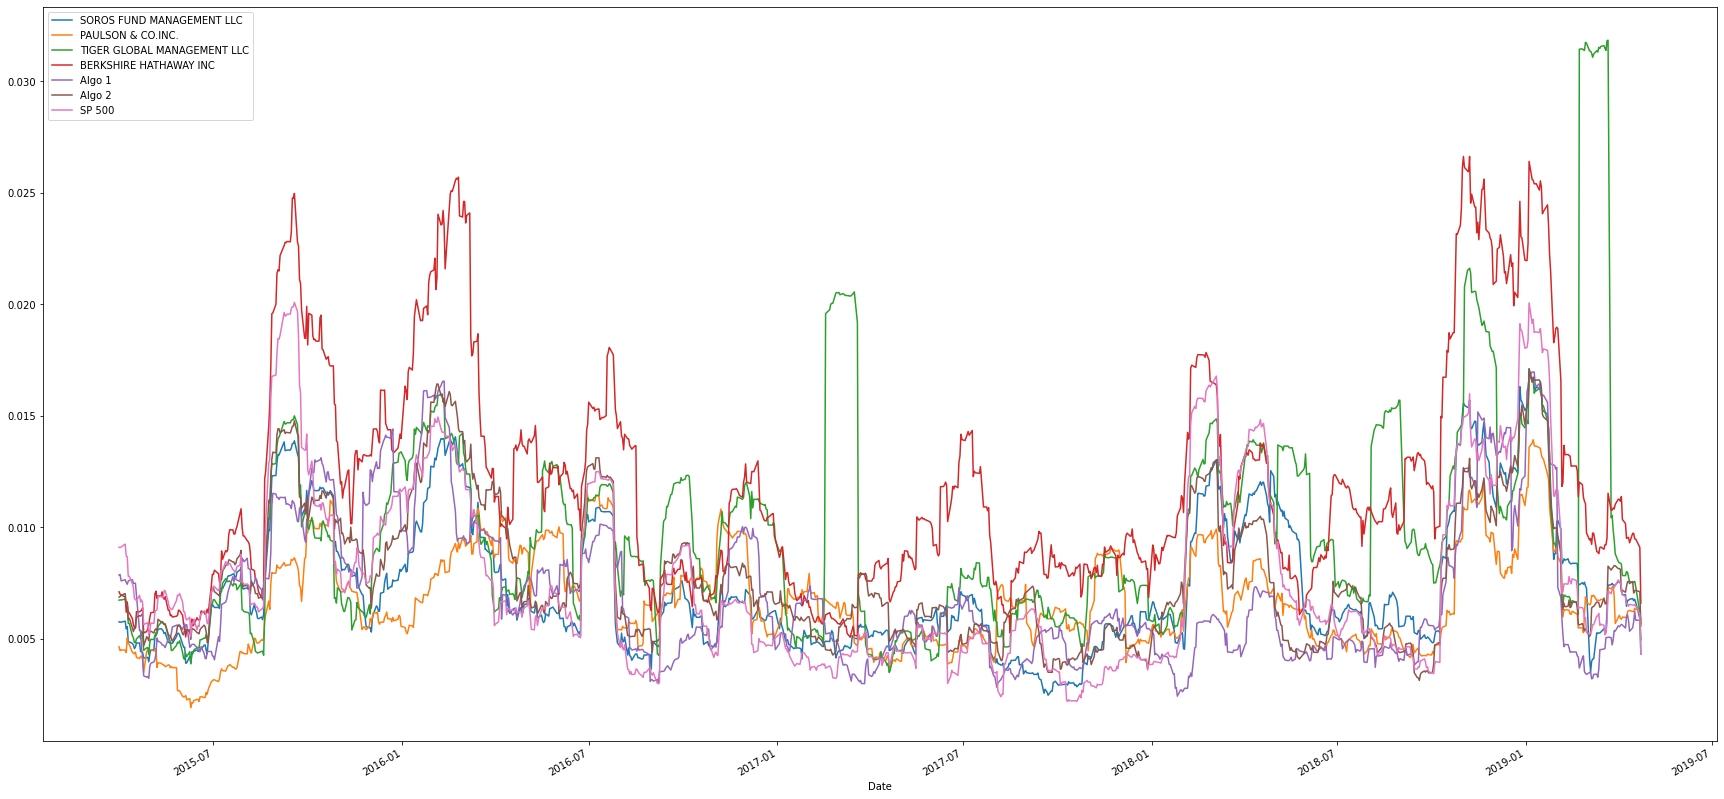

In [29]:
# Plot the rolling standard deviation

all_portfolio_return.rolling(window=21).std().plot(figsize=[30,15])

### Calculate and plot the correlation

In [30]:
# Calculate the correlation

all_portfolio_return.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [31]:
# Display de correlation matrix



### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

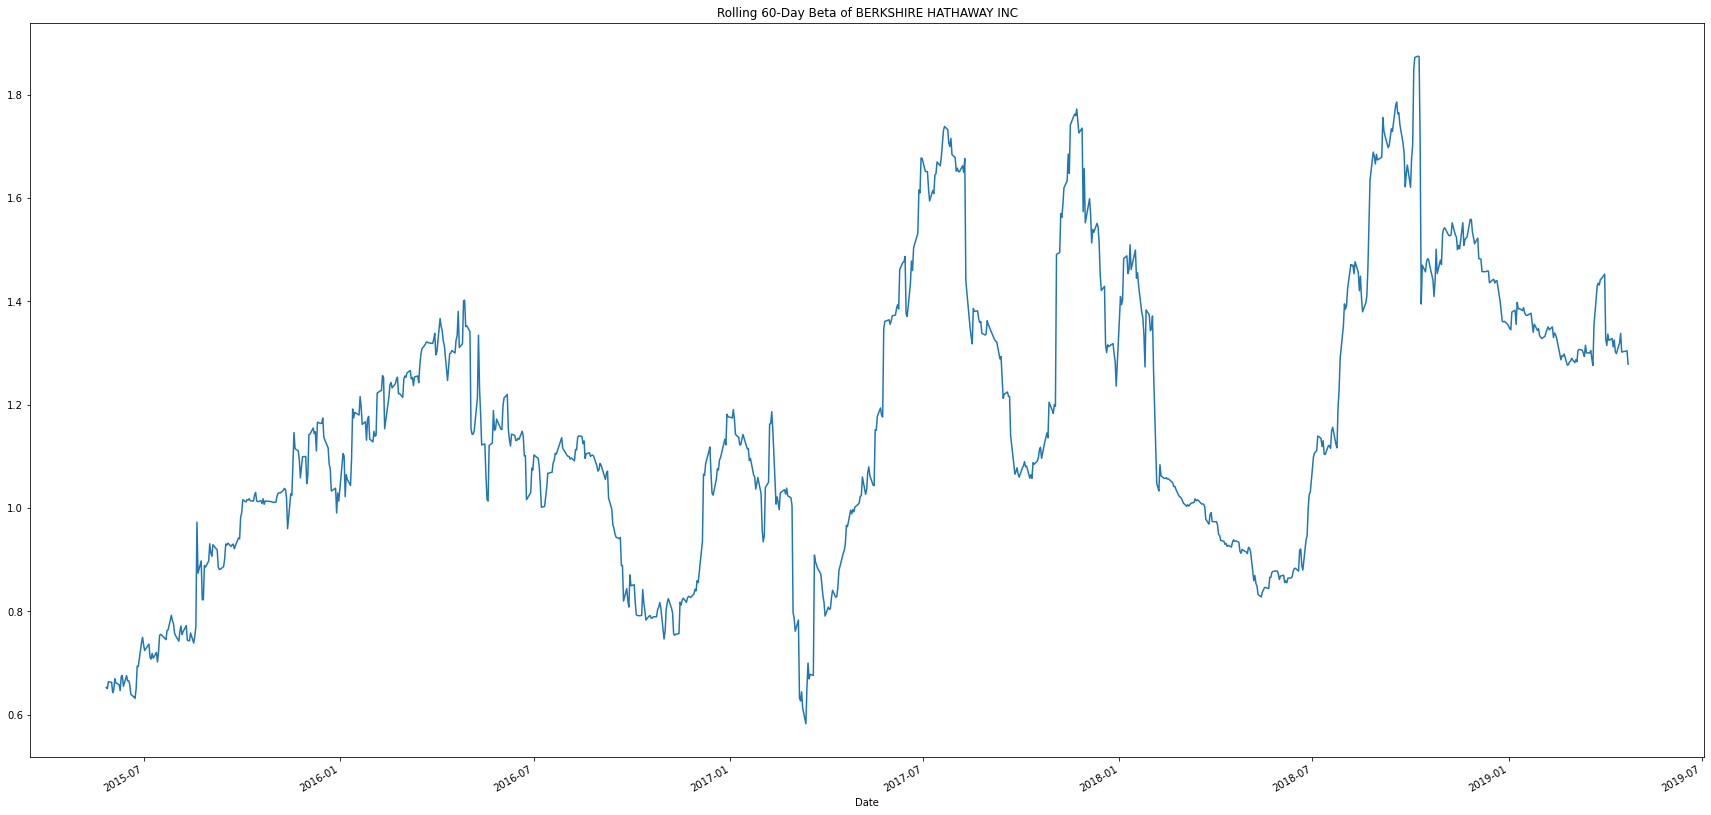

In [32]:

# Calculate variance of S&P 500

covariance_bh = all_portfolio_return['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_portfolio_return['SP 500'])
variance_sp500= all_portfolio_return['SP 500'].rolling(window=60).var()
rolling_beta_bh = covariance_bh/variance_sp500



# Computing beta

# Plot beta trend

rolling_beta_bh.plot(figsize=(30,15), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [33]:
# Use `ewm` to calculate the rolling window

all_portfolio_return.ewm(halflife=21).std().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [34]:
# Annualized Sharpe Ratios

sharpe_ratios = (all_portfolio_return.mean() * 252) / (all_portfolio_return.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP 500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

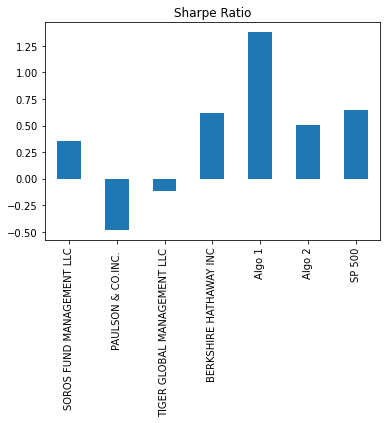

In [35]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [36]:
# Reading data from 1st stock
goog_path = Path('goog_historical.csv')
goog_df = pd.read_csv(goog_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True, usecols=["Trade DATE" , "NOCP"])
goog_df.head()

,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [37]:
# Reading data from 2nd stock
aapl_path = Path('aapl_historical.csv')
aapl_df = pd.read_csv(aapl_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True, usecols=["Trade DATE" , "NOCP"])
aapl_df.head()

,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [39]:
# Reading data from 3rd stock
cost_path = Path("cost_historical.csv")
cost_df = pd.read_csv(cost_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True, usecols=["Trade DATE" , "NOCP"])
cost_df.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [40]:
# Combine all stocks in a single DataFrame

portfolio_1 = pd.concat([goog_df, aapl_df, cost_df], axis="columns", join="inner")
portfolio_1.columns = ["GOOG", "AAPL", "COST" ]

portfolio_1_return = portfolio_1.sort_index().pct_change()
portfolio_1_return.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479


In [41]:
# Reset Date index
portfolio_1_return.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479


In [42]:
# Reorganize portfolio data by having a column per symbol

portfolio_1_return.dropna(inplace=True)
portfolio_1_return.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [44]:
# Set weights
weights = [1/3, 1/3, 1/3]
weighted_portfolio = portfolio_1_return.dot(weights)
weighted_portfolio.sum()

# Calculate portfolio return

cumulative_returns_1 = (1 + weighted_portfolio).cumprod()-1
# Display sample data

In [45]:
cumulative_returns_1.sum()

16.31500423586189

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [47]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_return = pd.concat([weighted_portfolio, whale_daily_returns, sp500_daily_returns], axis='columns', join='inner')
portfolio_return.rename(columns={0: 'MY PORTFOLIO'}, inplace=True)
portfolio_return.head()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,-0.002632


In [49]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_return.dropna(inplace=True)
portfolio_return.head()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,-0.002632


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [50]:
# Calculate the annualized `std`
annual_portfolio_std = portfolio_return.std() * np.sqrt(252)
annual_portfolio_std

MY PORTFOLIO                   0.211496
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
SP 500                         0.152054
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [51]:
# Calculate rolling standard deviation
portfolio_return.rolling(window=30).std().tail()
# Plot rolling standard deviation


,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP 500
2019-04-16,0.008764,0.006740,0.005751,0.007479,0.009869,0.006548
2019-04-17,0.008717,0.006539,0.005542,0.007362,0.009874,0.006415
2019-04-18,0.008226,0.006293,0.005513,0.006858,0.009057,0.006150
2019-04-22,0.007848,0.006340,0.005663,0.006895,0.008949,0.006107
2019-04-23,0.007033,0.005891,0.005624,0.006922,0.008608,0.005772


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [52]:
# Calculate and plot Beta
covariance = portfolio_return['MY PORTFOLIO'].cov(portfolio_return['SP 500'])
variance = portfolio_return['SP 500'].var()
beta = covariance/variance
beta

1.2127120076458702

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [53]:
# Calculate Annualzied Sharpe Ratios
annual_portfolio_sharpe_ratio = (portfolio_return.mean() * 252)/(portfolio_return.std() * np.sqrt(252))
annual_portfolio_sharpe_ratio

MY PORTFOLIO                   0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
SP 500                         0.584820
dtype: float64

<AxesSubplot:>

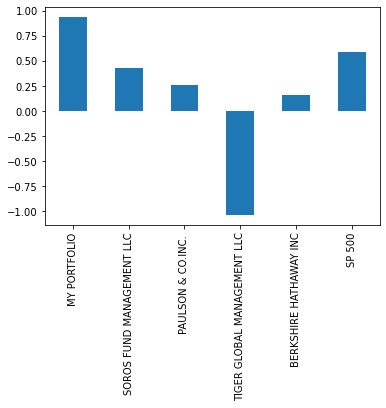

In [55]:
# Visualize the sharpe ratios as a bar plot
annual_portfolio_sharpe_ratio.plot.bar()

### How does your portfolio do?

Write your answer here!

In [ ]:
# My portfolio is outperforming Soros, Paulson & Co, Tiger Global, Berkshire Hathaway, and the S&P 500. While my portfolio may be smaller than the comparative portfolios, pound per pound it is outperforming. However, all of the portfolios have a Sharpe Ratio below 1. This means all portfolios have room for improvement to at least clear a numerical value of 1 threshold.